<a href="https://colab.research.google.com/github/angelostefanini/data_analytics/blob/main/Analisi_google_search_console.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import seaborn as sns

# Replace "your_file_path_or_url.csv" with the actual path or URL of your dataset
search_console = pd.read_csv("Query.csv")

# Examine first 5 rows of the dataset
print(search_console.head())


                   Query più frequenti  Clic  Impressioni     CTR  Posizione
0                    vocidallagermania    26           37  70.27%       1.08
1     stipendio odontotecnico germania    11          421   2.61%       6.84
2                        zalando zonar    11           26  42.31%       6.35
3       cercasi autisti disperatamente     8          513   1.56%      28.08
4  stipendio operaio mercedes germania     5          189   2.65%       9.25


In [10]:
print(search_console)


                     Query più frequenti  Clic  Impressioni     CTR  Posizione
0                      vocidallagermania    26           37  70.27%       1.08
1       stipendio odontotecnico germania    11          421   2.61%       6.84
2                          zalando zonar    11           26  42.31%       6.35
3         cercasi autisti disperatamente     8          513   1.56%      28.08
4    stipendio operaio mercedes germania     5          189   2.65%       9.25
..                                   ...   ...          ...     ...        ...
994            stipendio corriere amazon     0            1      0%      74.00
995   stipendio medio falegname svizzera     0            1      0%      74.00
996      stipendio medio operaio tedesco     0            1      0%      74.00
997                    affitto a berlino     0            1      0%      75.00
998                esitazione in inglese     0            1      0%      75.00

[999 rows x 5 columns]


In [12]:
print(search_console.columns)

Index(['Query più frequenti', 'Clic', 'Impressioni', 'CTR', 'Posizione'], dtype='object')


In [15]:
# Subset del DataFrame selezionando solo le colonne di interesse
search_console = search_console[['Query più frequenti', 'Clic', 'Impressioni', 'Posizione']]

# Reset index
search_console.reset_index(inplace=True, drop=True)
print(search_console)

                     Query più frequenti  Clic  Impressioni  Posizione
0                      vocidallagermania    26           37       1.08
1       stipendio odontotecnico germania    11          421       6.84
2                          zalando zonar    11           26       6.35
3         cercasi autisti disperatamente     8          513      28.08
4    stipendio operaio mercedes germania     5          189       9.25
..                                   ...   ...          ...        ...
994            stipendio corriere amazon     0            1      74.00
995   stipendio medio falegname svizzera     0            1      74.00
996      stipendio medio operaio tedesco     0            1      74.00
997                    affitto a berlino     0            1      75.00
998                esitazione in inglese     0            1      75.00

[999 rows x 4 columns]


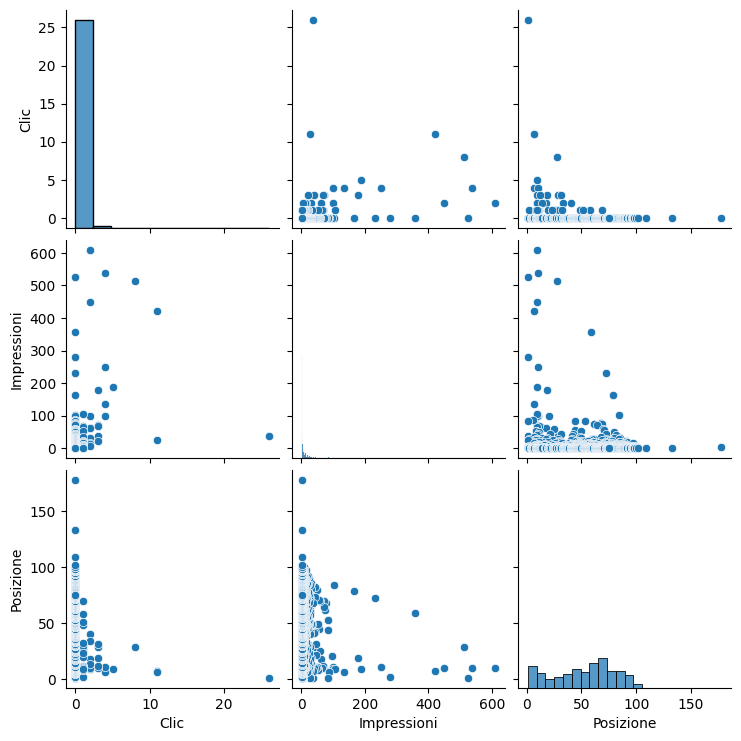

In [30]:
sns.pairplot(search_console)

In [22]:
# Subset X and y variables
variabili_X = search_console[["Posizione", "Impressioni"]]
variabili_y = search_console[["Clic"]]

In [23]:
# Import train-test-split function from sci-kit learn
from sklearn.model_selection import train_test_split
# Create training data sets and holdout (testing) data sets
X_train, X_test, y_train, y_test = train_test_split(variabili_X, variabili_y,
                                                    test_size = 0.3, random_state = 42)

In [24]:
# Write out OLS formula as a string
ols_formula = "Clic ~ Posizione + Impressioni"

In [25]:
from statsmodels.formula.api import ols

In [26]:
# Create OLS dataframe
ols_data = pd.concat([X_train, y_train], axis = 1)

# Create OLS object and fit the model
OLS = ols(formula = ols_formula, data = ols_data)
model = OLS.fit()

In [27]:
# Get model results
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Clic   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     42.31
Date:                Fri, 26 Jan 2024   Prob (F-statistic):           4.56e-18
Time:                        10:29:05   Log-Likelihood:                -1047.4
No. Observations:                 699   AIC:                             2101.
Df Residuals:                     696   BIC:                             2115.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.2865      0.089      3.207      0.001       0.111       0.462
Posizione      -0.0047      0.001     -3.199      0.001      -0.008      -0.002
Impressioni     0.0081      0.001      8.030      0.000       0.006       0.010
==============================================================================
Omnibus:                     1577.117   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5560180.178
Skew:                          19.014   Prob(JB):                         0.00
Kurtosis:                     438.272   Cond. No.                         131.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Per Posizione,**  un aumento di una unità nella variabile è associato a una diminuzione di circa 0.0047 unità nella variabile dipendente (Clic).

**Per Impressioni: ** un aumento di una unità nella variabile è associato a un aumento di circa 0.0081 unità nella variabile dipendente (Clic).

**Dep. Variable** (Variabile dipendente): Clic

**R-squared (R-quadrato):** Misura la proporzione di varianza nella variabile dipendente (Clic) che è spiegata dalle variabili indipendenti (Posizione e Impressioni). In questo caso, l'0.108 significa che circa il 10.8% della varianza in "Clic" è spiegato dal modello.

**Adj. R-squared (R-quadrato corretto):** Simile a R-quadrato, ma tiene conto del numero di predittori nel modello. L'0.106 indica che circa il 10.6% della varianza è spiegato, e questo valore è corretto per il numero di predittori.
F-statistic (Statistiche F): Test di significatività complessiva del modello. In questo caso, un valore di 42.31 con un p-value molto basso suggerisce che il modello nel suo complesso è statisticamente significativo.

**Prob (F-statistic): **Il p-value associato all'F-statistic. In questo caso, è molto basso (4.56e-18), indicando che il modello è globalmente significativo.
coef (Coefficienti): Questi sono i coefficienti stimati per ciascuna variabile indipendente. Ad esempio, l'Intercept è 0.2865, il coefficiente per Posizione è -0.0047, e per Impressioni è 0.0081.

**std err (Errore standard):** La deviazione standard dell'errore stimato per ciascun coefficiente.

**t (Statistiche t):** Il rapporto tra il coefficiente stimato e il suo errore standard. In generale, più grande è il t, più significativo è il coefficiente.
P>|t| (Valori p): Il p-value associato alle statistiche t. In questo contesto, indica la significatività statistica dei coefficienti.

**[0.025 0.975] (Intervallo di confidenza del 95%):** L'intervallo di confidenza del 95% per ciascun coefficiente.

**Omnibus:** Test di normalità dei residui. In questo caso, un valore p molto basso suggerisce che i residui non seguono una distribuzione normale.

Durbin-Watson: Test di autocorrelazione dei residui. Un valore vicino a 2 indica che non c'è autocorrelazione significativa.

Jarque-Bera (JB): Test di normalità dei residui con asimmetria e curtosi. Un valore p molto basso suggerisce non normalità.

Cond. No. (Condizione Numero): Il numero di condizione, una misura della stabilità della matrice delle variabili indipendenti. Un valore alto può indicare multicollinearità.


In [32]:
residuals = model.resid

<Axes: xlabel='Posizione', ylabel='Clic'>

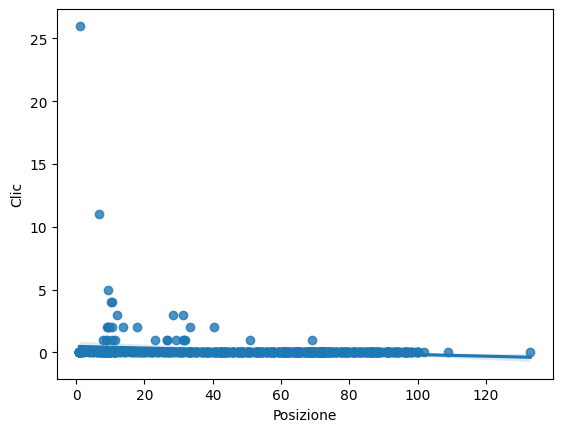

In [33]:
sns.regplot(x="Posizione", y="Clic", data = ols_data)

<Axes: xlabel='Impressioni', ylabel='Clic'>

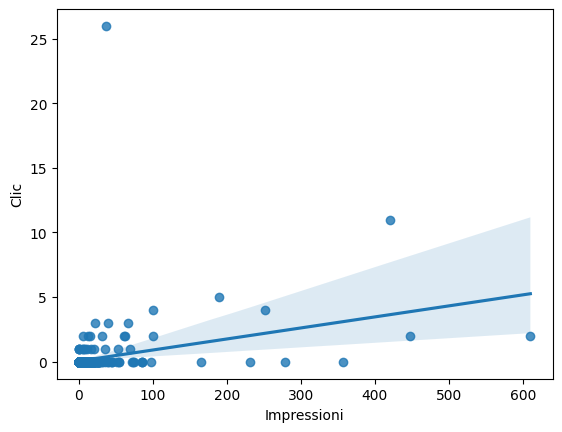

In [34]:
sns.regplot(x="Impressioni", y="Clic", data = ols_data)

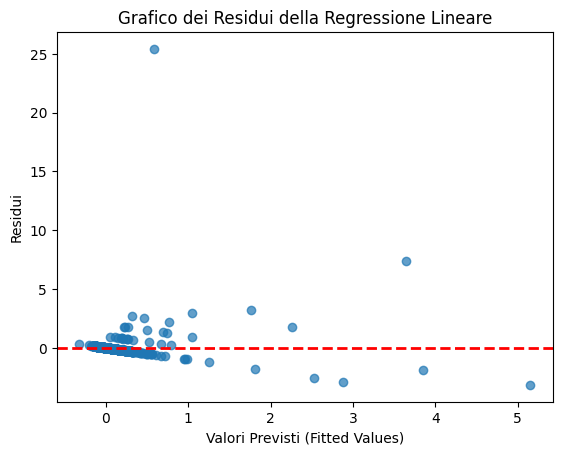

In [35]:
import matplotlib.pyplot as plt

# Calcola i valori previsti (fitted values) e i residui
fitted_values = model.fittedvalues
residuals = model.resid

# Crea il grafico a dispersione dei residui
plt.scatter(fitted_values, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)  # Aggiunge una linea orizzontale a y=0 per una migliore visualizzazione
plt.title("Grafico dei Residui della Regressione Lineare")
plt.xlabel("Valori Previsti (Fitted Values)")
plt.ylabel("Residui")
plt.show()

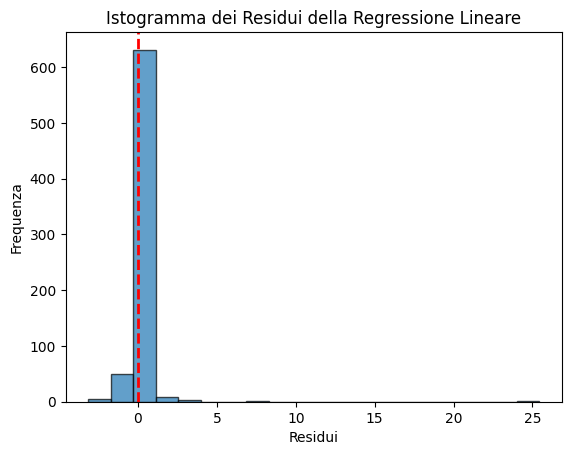

In [36]:
import matplotlib.pyplot as plt

# Calcola i residui del modello di regressione
residuals = model.resid

# Crea l'istogramma dei residui
plt.hist(residuals, bins=20, edgecolor='black', alpha=0.7)
plt.axvline(x=0, color='r', linestyle='--', linewidth=2)  # Aggiunge una linea verticale a x=0 per una migliore visualizzazione
plt.title("Istogramma dei Residui della Regressione Lineare")
plt.xlabel("Residui")
plt.ylabel("Frequenza")
plt.show()
